# Klasifikasi Sleep Health dan Lifestyle Dataset

Mutiara M. Samosir 23083010026

Tugas Data Analisis Eksploratif A

# Deskripsi Kasus

Merupakan kumpulan data Kesehatan Tidur dan Gaya Hidup terdiri dari 374 baris dan 13 kolom, yang mencakup berbagai variabel terkait tidur dan kebiasaan sehari-hari. Data tersebut digunakan untuk mengetahui faktor-faktor apa saja yang mempengaruhi pola tidur berdasarkan variabel - variabel yang akan dianalisis, yakni sebagai berikut:

1. Person ID : pengenal untuk setiap individu (1,2,3,4,...)

2. Gender (Male or Female)

3. Age (Continuous)

4. Occupation (Software Engineer, Doctor, Sales Representative, Teacher, Nurse, Engineer, Accountant, Scientist, Lawyer,   Salesperson, and Manager)

5. Sleep Duration (jam) : jumlah jam orang tidur per hari.

6. Quality of Sleep (skala: 1-10)

7. Physical Activity Level (menit/hari): Jumlah menit orang tersebut melakukan aktivitas fisik setiap hari.

8. Stress Level (skala: 1-10)

9. BMI Category (Underweight, Normal, Overweight, Obese)

10. Blood Pressure (sistolik/diastolik) : misalnya 126/83, 125/80, 140/90, ...

11. Heart Rate (bpm): Denyut jantung istirahat orang tersebut dalam denyut per menit( 75, 80, 77, 79,..)

12. Daily Steps: Jumlah langkah yang diambil orang tersebut per hari (10000, 4200, 3500,..)

13. Sleep Disorder: Ada atau tidaknya gangguan tidur pada seseorang (Tidak Ada, Insomnia, Sleep Apnea).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv(r"C:\Users\Documents\semester 3\data analisis eksploratif\dataset1.csv", sep=';')

print(df.head())

print(df.info())

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer              61   
1          2   Male   28                Doctor              62   
2          3   Male   28                Doctor              62   
3          4   Male   28  Sales Representative              59   
4          5   Male   28  Sales Representative              59   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75      

Langkah pertama adalah membaca dataset dari file CSV, memeriksa struktur dan tipe data dari dataset, serta menampilkan beberapa baris pertama untuk analisis awal

In [3]:
print(df.dtypes)

Person ID                   int64
Gender                     object
Age                         int64
Occupation                 object
Sleep Duration              int64
Quality of Sleep            int64
Physical Activity Level     int64
Stress Level                int64
BMI Category               object
Blood Pressure             object
Heart Rate                  int64
Daily Steps                 int64
Sleep Disorder             object
dtype: object


Dengan code di atas akan mudah memahami  tipe data yang ada dalam dataset

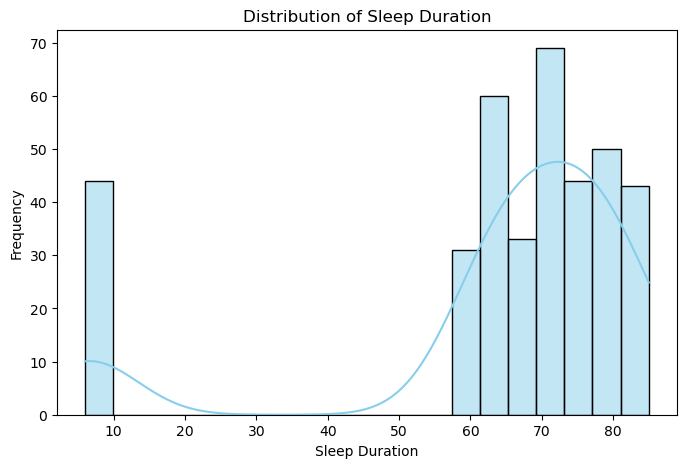

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Sleep Duration (Multimodal dan left-skewed)
plt.figure(figsize=(8, 5))
sns.histplot(data['Sleep Duration'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Frequency')
plt.show()

pada sleep duration distribusi yang cocok digunakan adalah Distribusi Multimodal. Karena distribusi ini memiliki beberapa puncak (nilai mode) yang menunjukkan bahwa terdapat beberapa kelompok yang memiliki durasi tidur yang berbeda. Misalnya, bisa jadi ada kelompok yang tidur sekitar 60, 70, atau 10 menit. Skewness ke kiri menunjukkan bahwa sebagian besar data berkumpul pada nilai yang lebih tinggi, tetapi ada beberapa nilai rendah yang menarik distribusi ke kiri, mengindikasikan bahwa ada beberapa individu yang tidur kurang dari rata-rata.Distribusi ini menggambarkan variasi dalam pola tidur di populasi yang diteliti. Beberapa orang mungkin memiliki pola tidur yang teratur, sementara yang lain mungkin mengalami gangguan tidur. Skewness ke kiri menunjukkan bahwa ada lebih banyak individu yang tidur lebih lama, dengan beberapa individu yang tidur jauh lebih sedikit.

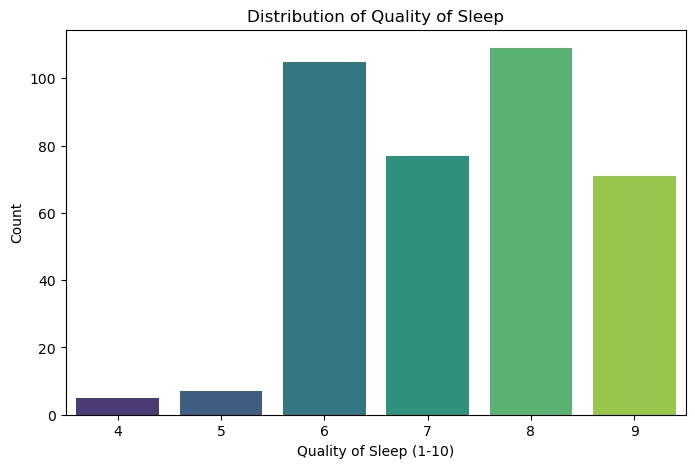

In [12]:
# 2. Quality of Sleep (Discrete Distribution)
plt.figure(figsize=(8, 5))
sns.countplot(x=data['Quality of Sleep'], palette='viridis')
plt.title('Distribution of Quality of Sleep')
plt.xlabel('Quality of Sleep (1-10)')
plt.ylabel('Count')
plt.show()

Pada variabel Quality of Sleep distribusi yang digunakan adalah Discrete distribution karena nilai Quality of Sleep yang diukur dengan skala 1-10 adalah angka diskrit, artinya hanya dapat mengambil nilai tertentu (tidak bisa memiliki nilai pecahan). Nilai-nilai ini biasanya terdistribusi dalam beberapa kategori dengan frekuensi tertentu, misalnya,sebagian besar individu mungkin melaporkan kualitas tidur di sekitar nilai 7 atau 8.

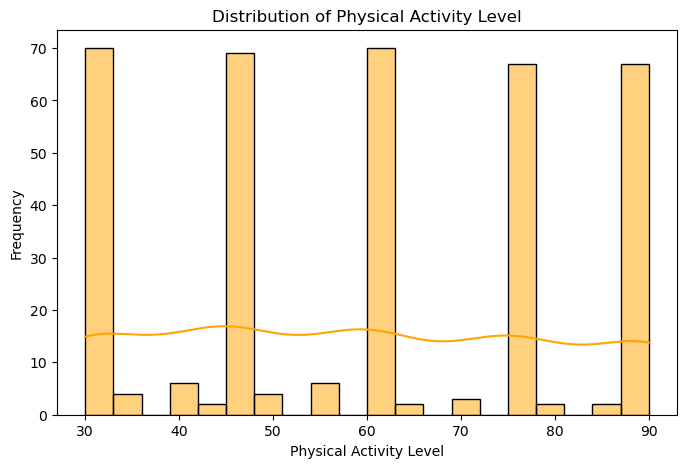

In [13]:
# 3. Physical Activity Level (Bimodal distribution)
plt.figure(figsize=(8, 5))
sns.histplot(data['Physical Activity Level'], kde=True, bins=20, color='orange')
plt.title('Distribution of Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')
plt.show()

Pada variabel Physical Activity Level yang digunakan adalag Bimodal distribution.Karena terdapat dua puncak yang dominan pada Physical Activity Level, seperti aktivitas rendah (misalnya, sekitar 30) dan aktivitas tinggi (misalnya, sekitar 75). Ini menunjukkan bahwa ada dua kelompok individu dengan pola aktivitas fisik yang berbeda, misalnya, mereka yang tidak aktif dan mereka yang sangat aktif.

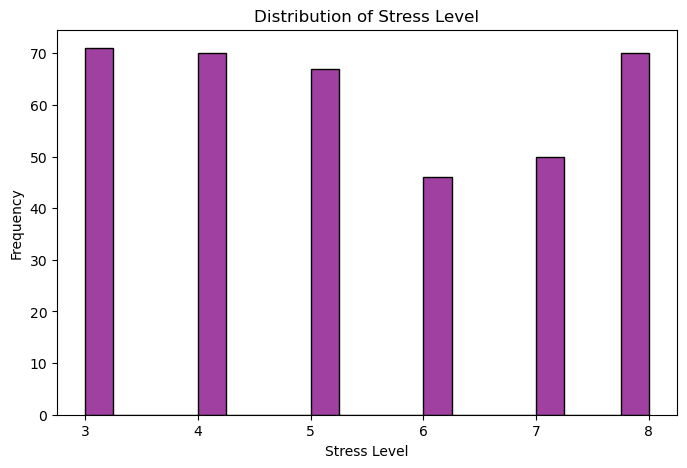

In [14]:

# 4. Stress Level (Uniform distribution)
plt.figure(figsize=(8, 5))
sns.histplot(data['Stress Level'], kde=False, bins=20, color='purple')
plt.title('Distribution of Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()


Pada variabel Stress Level menggunakan Uniform distribution.Karena jika nilai Stress Level tersebar merata di seluruh rentang (misalnya, dari 1 hingga 10) tanpa ada mode yang dominan, maka distribusi ini dapat dianggap seragam. Dalam hal ini, tidak ada nilai yang lebih sering muncul dibandingkan yang lain, yang menunjukkan bahwa semua tingkat stres memiliki frekuensi yang hampir sama.

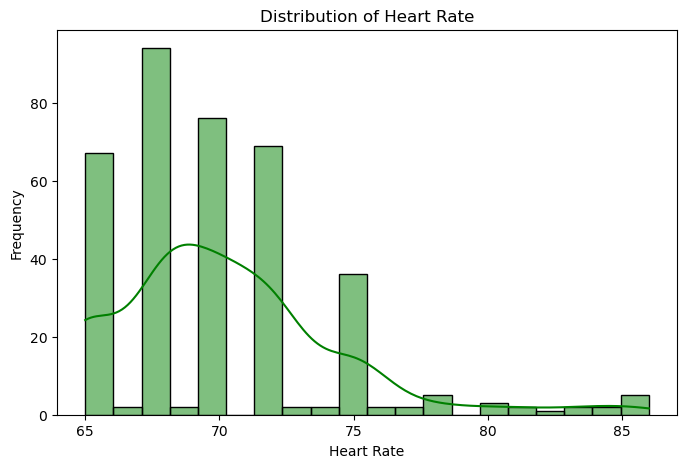

In [15]:

# 5. Heart Rate (Unimodal, left-skewed)
plt.figure(figsize=(8, 5))
sns.histplot(data['Heart Rate'], kde=True, bins=20, color='green')
plt.title('Distribution of Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.show()


pada Heart Rate menggunakan Unimodal distribution, karena Heart Rate biasanya memiliki satu puncak yang dominan (misalnya, sekitar 68 bpm). Namun, ada juga beberapa nilai outlier yang lebih rendah, yang dapat menarik distribusi ke arah kiri, menunjukkan bahwa sebagian individu memiliki detak jantung yang jauh lebih rendah dibandingkan rata-rata.

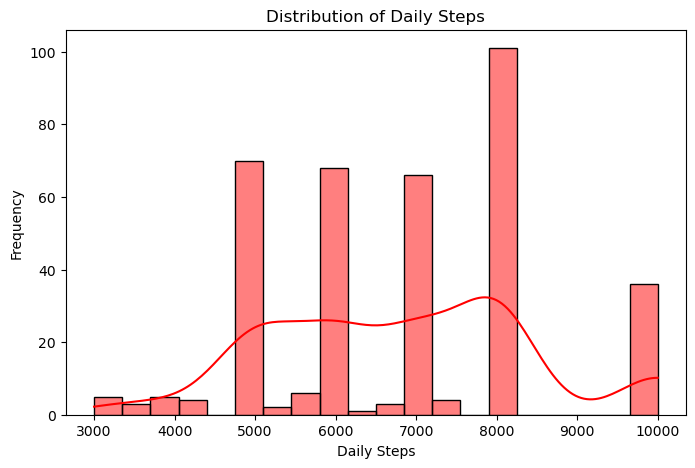

In [16]:

# 6. Daily Steps (Right-skewed distribution)
plt.figure(figsize=(8, 5))
sns.histplot(data['Daily Steps'], kde=True, bins=20, color='red')
plt.title('Distribution of Daily Steps')
plt.xlabel('Daily Steps')
plt.ylabel('Frequency')
plt.show()

Daily Steps menggunakan Right-skewed distribution.Karena distribusi ini menunjukkan bahwa sebagian besar individu berjalan dalam jumlah langkah yang lebih rendah, tetapi ada beberapa individu yang aktif dan berjalan dalam jumlah langkah yang jauh lebih tinggi, menciptakan ekor panjang ke kanan. Ini menunjukkan bahwa ada variasi besar dalam tingkat aktivitas fisik individu

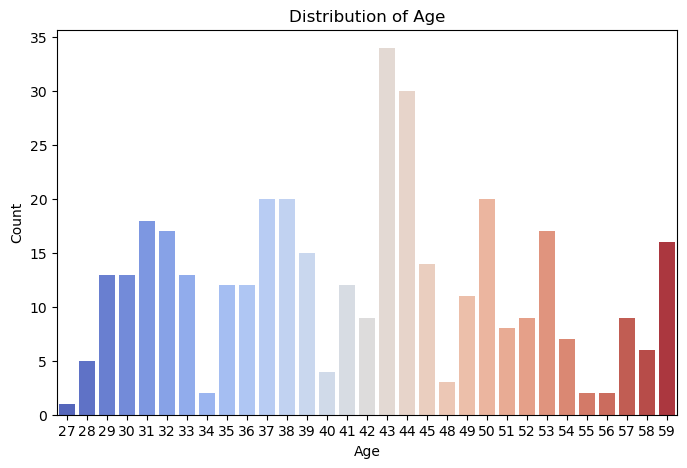

In [17]:
# 7. Age (Discrete distribution)
plt.figure(figsize=(8, 5))
sns.countplot(x=data['Age'], palette='coolwarm')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Age menggunakan Discrete distribution.Karena usia sering kali dicatat dalam angka bulat (misalnya, 20, 21, 22, dst.), menjadikannya variabel diskrit.sehingga mudah untuk menganalisis dan membandingkan kelompok usia

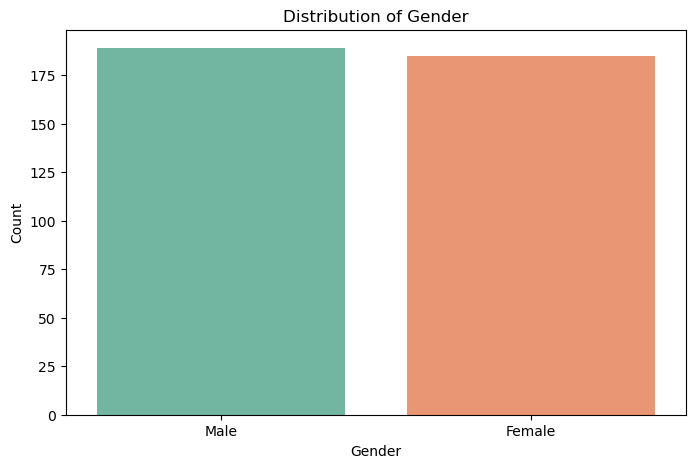

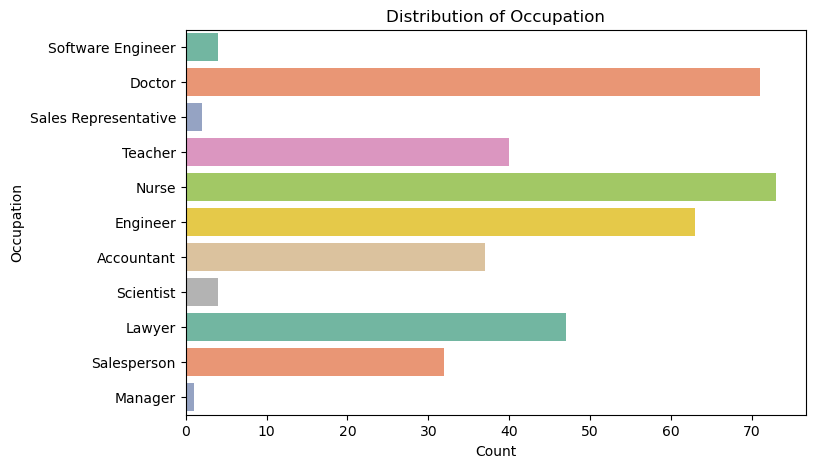

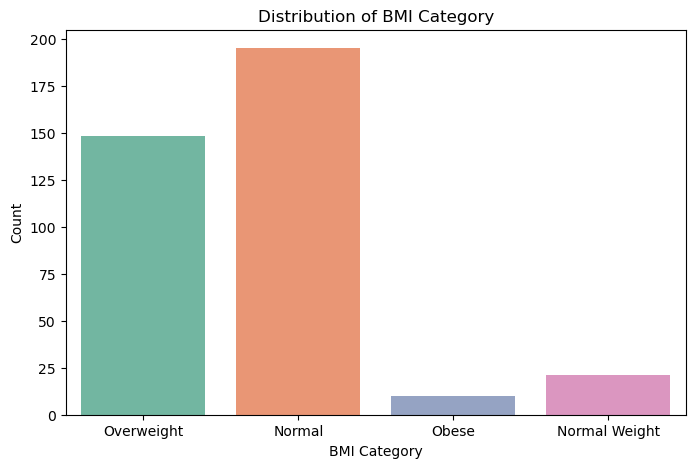

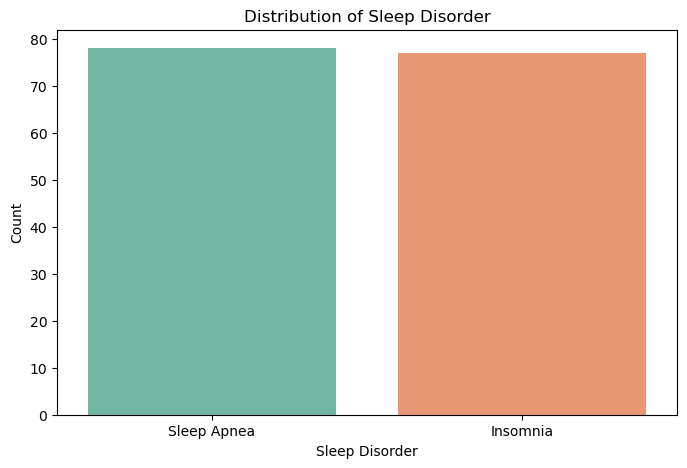

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


categorical_columns = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    if col == 'Occupation':
        sns.countplot(y=data[col], palette='Set2')  # Tukar X dan Y
        plt.title(f'Distribution of {col}')
        plt.ylabel(col)
        plt.xlabel('Count')
    else:
        sns.countplot(x=data[col], palette='Set2')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
    plt.show()


Pada variabel Gender, Occupation, BMI Category, Sleep Disorder menggunakan Categorical distribution.Karena variabel-variabel ini bersifat kategorikal, yang berarti mereka dapat mengambil nilai tertentu tanpa urutan numerik. Misalnya, Gender memiliki dua kategori (Male/Female), Occupation memiliki beberapa kategori pekerjaan, dan BMI Category juga terdistribusi dalam beberapa kategori (Underweight, Normal, Overweight, Obese).

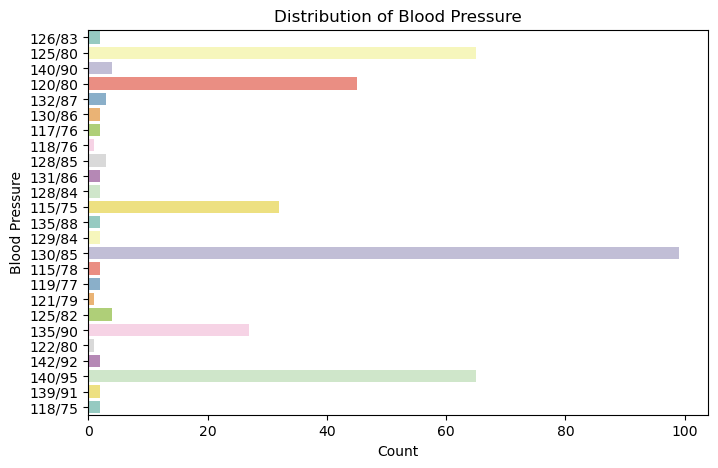

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(y=data['Blood Pressure'], palette='Set3')  
plt.title('Distribution of Blood Pressure')
plt.xlabel('Count')
plt.ylabel('Blood Pressure')
plt.show()

Blood Pressure menggunakan Categorical distribution. Meskipun pengukuran tekanan darah umumnya numerik, dalam konteks ini, Blood Pressure telah dikategorikan dalam bentuk string (misalnya, Normal, Prehypertension, Hypertension), sehingga dapat dianggap sebagai distribusi kategorikal. Setiap kategori memiliki nilai terpisah yang menggambarkan kondisi kesehatan individu.

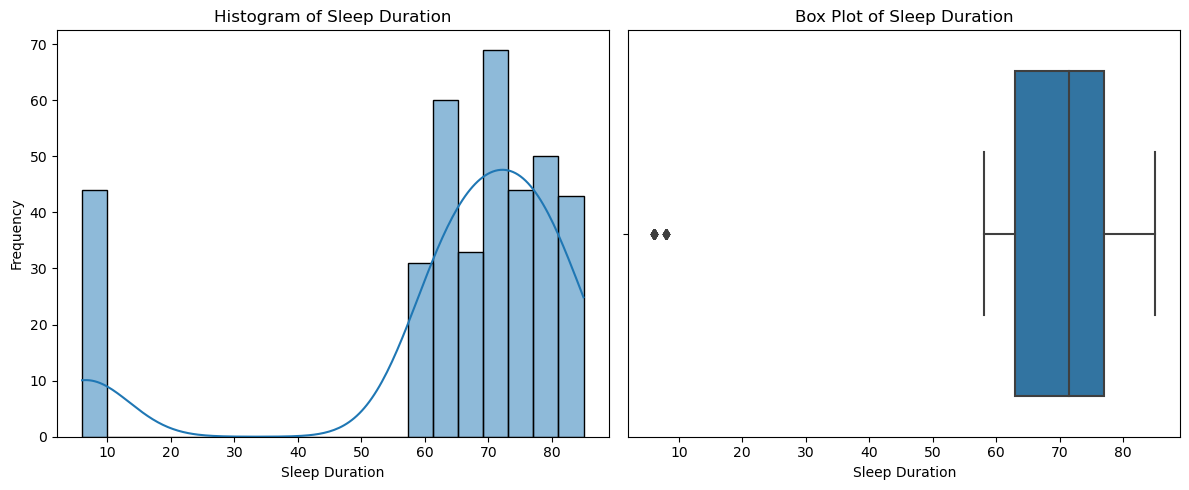

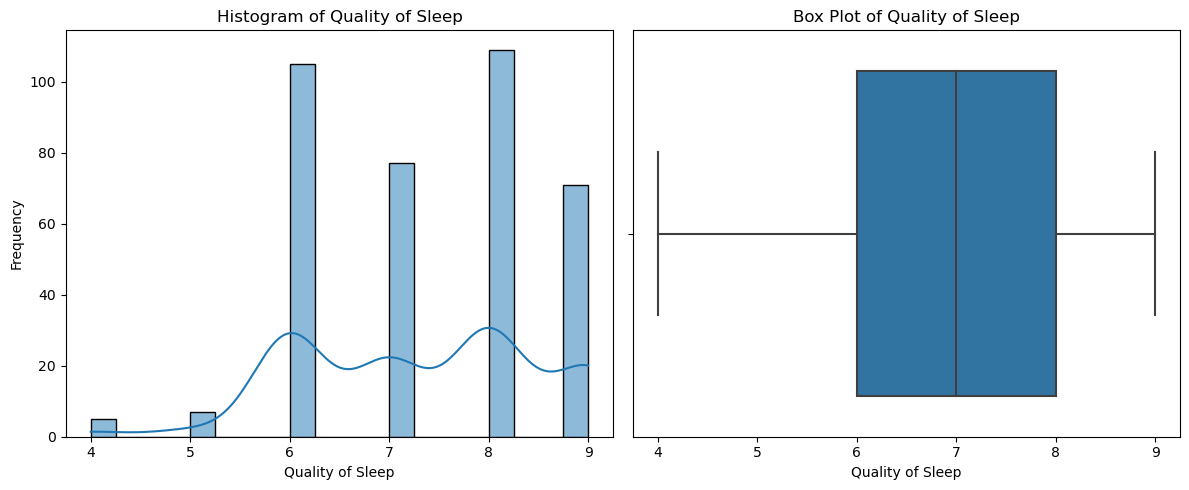

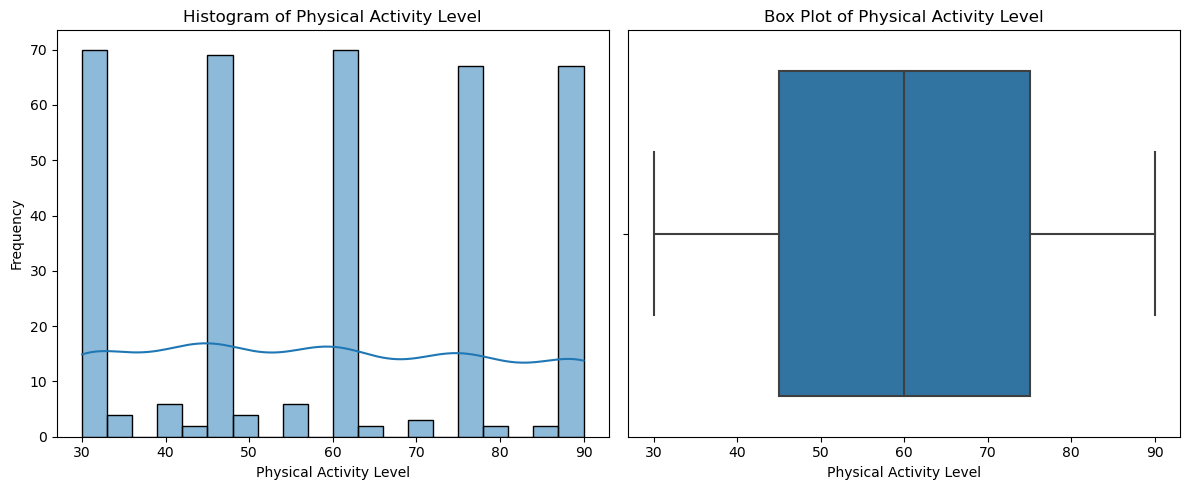

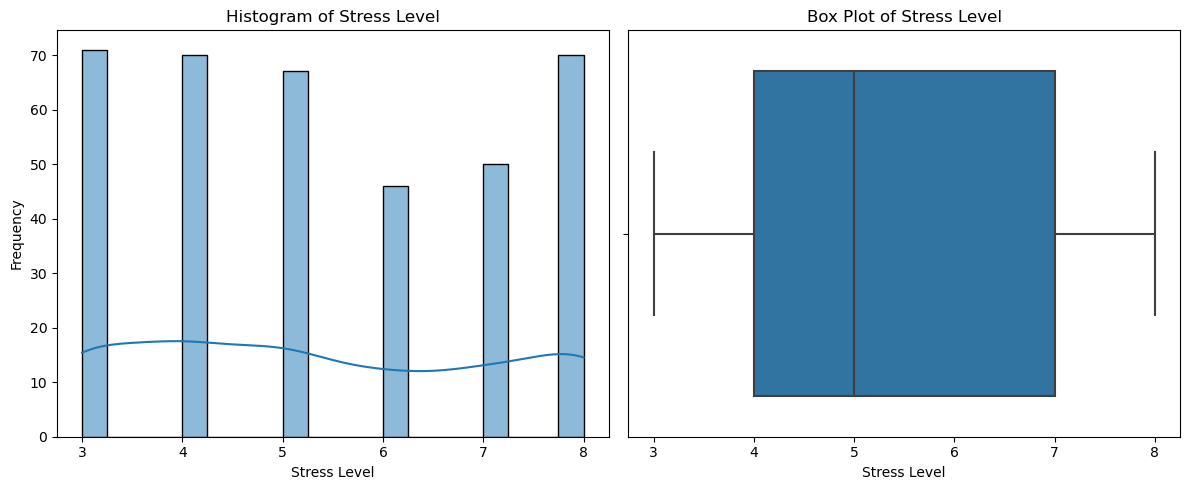

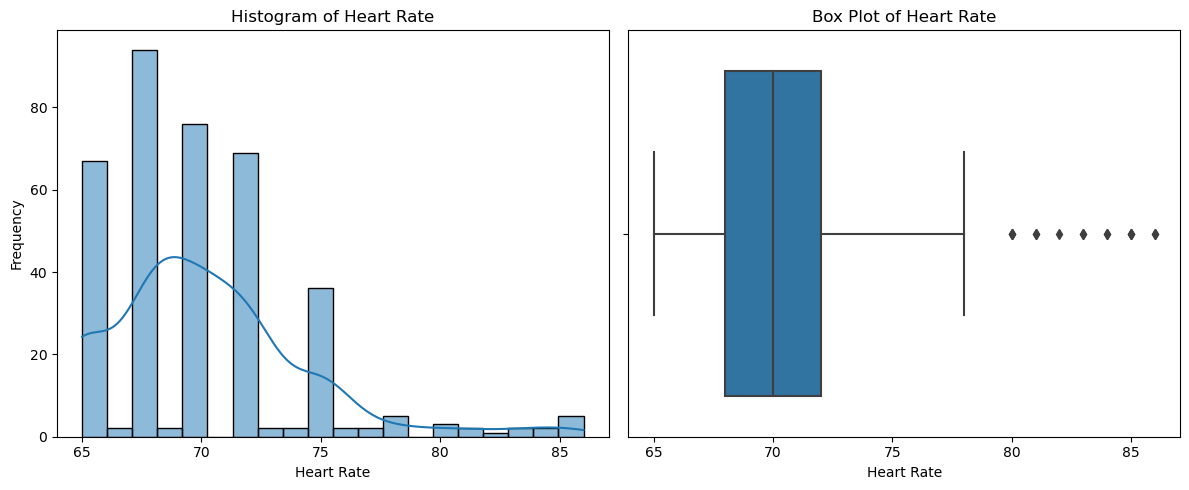

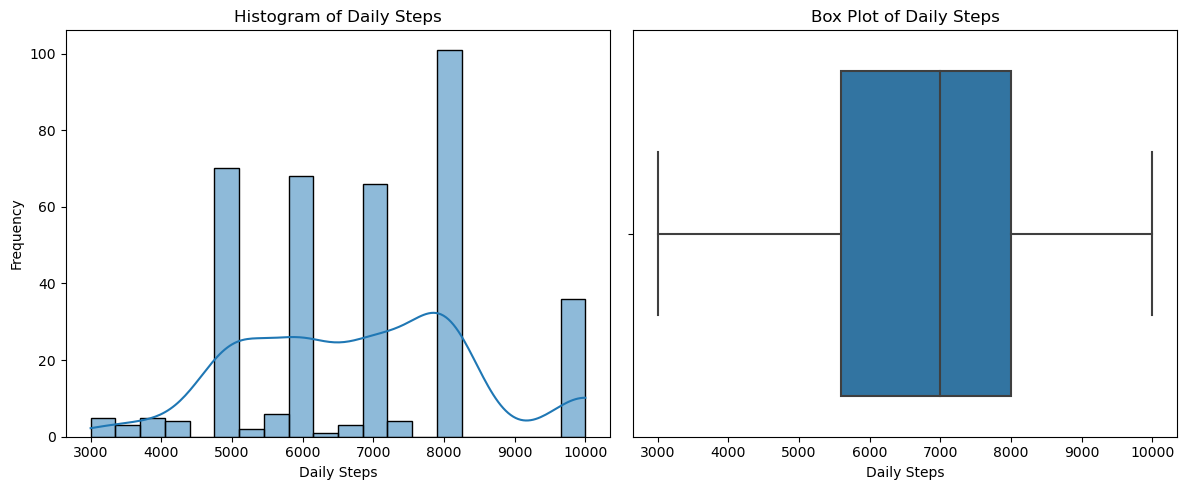

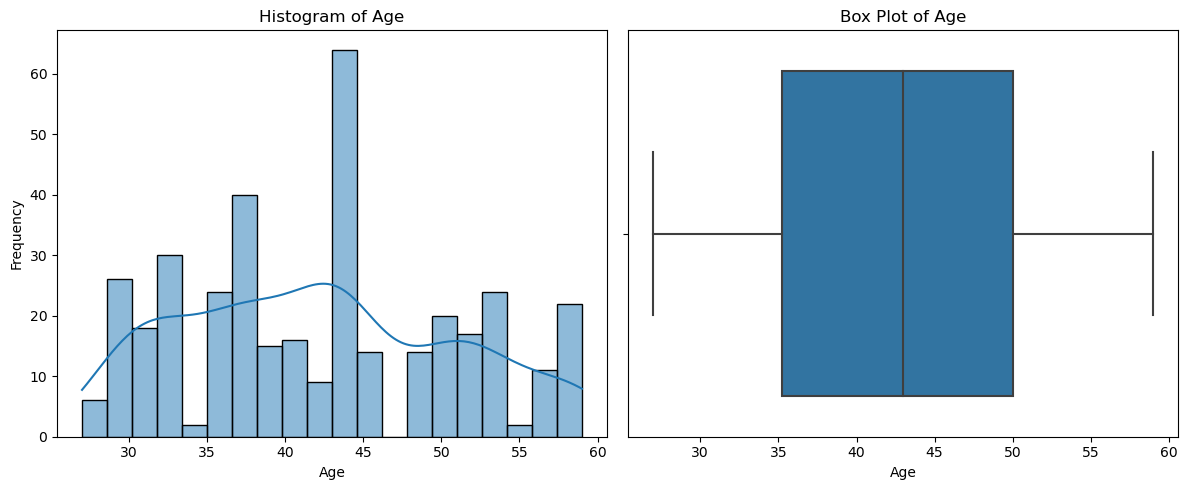

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_distributions(columns):
    for column in columns:
        plt.figure(figsize=(12, 5))
        
       
        plt.subplot(1, 2, 1)
        sns.histplot(data[column], kde=True, bins=20)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

       
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data[column])
        plt.title(f'Box Plot of {column}')
        plt.xlabel(column)
        plt.tight_layout()
        plt.show()

columns_to_visualize = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
                        'Stress Level', 'Heart Rate', 'Daily Steps', 'Age']

visualize_distributions(columns_to_visualize)


Kode ini bertujuan untuk memvisualisasikan distribusi data dari kolom yang ditentukan dalam dataset dengan menggunakan histogram dan box plot. Histogram memberikan gambaran tentang frekuensi data, sedangkan box plot menunjukkan rangkaian nilai, termasuk outlier. Pada outputnya terdapat 2 variabell yang memiliki outlier yaitu Sleep Duration dan Heart Rate

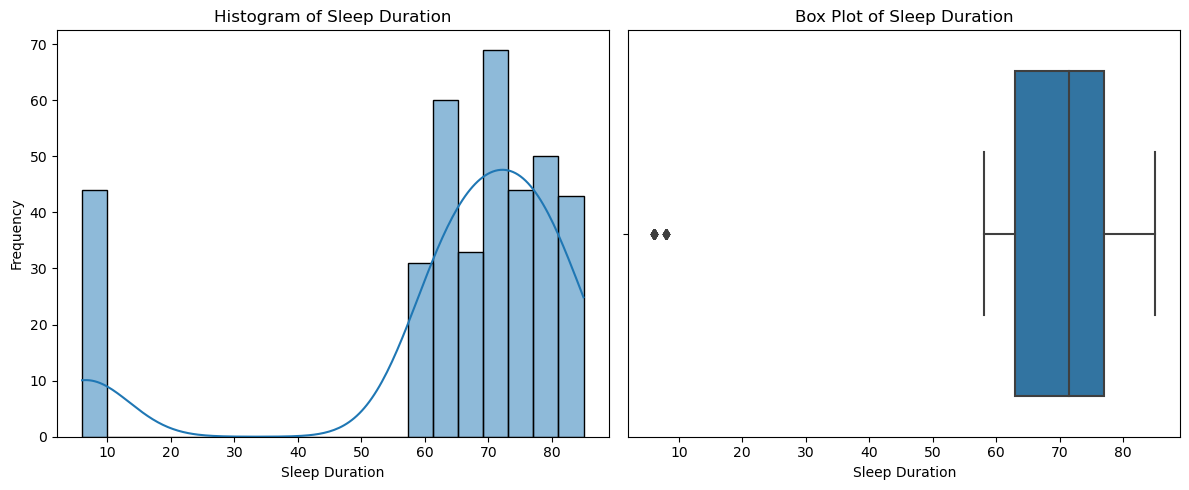

Outliers in Sleep Duration:
 13     6
14     6
15     6
17     6
52     6
54     6
55     6
57     6
58     6
60     6
61     6
67     6
74     6
75     6
76     6
77     6
78     6
79     6
149    8
150    8
268    6
280    6
282    6
283    6
284    6
285    6
286    6
287    6
288    6
290    6
293    6
295    6
303    6
352    8
353    8
354    8
355    8
356    8
357    8
358    8
364    8
365    8
367    8
370    8
Name: Sleep Duration, dtype: int64


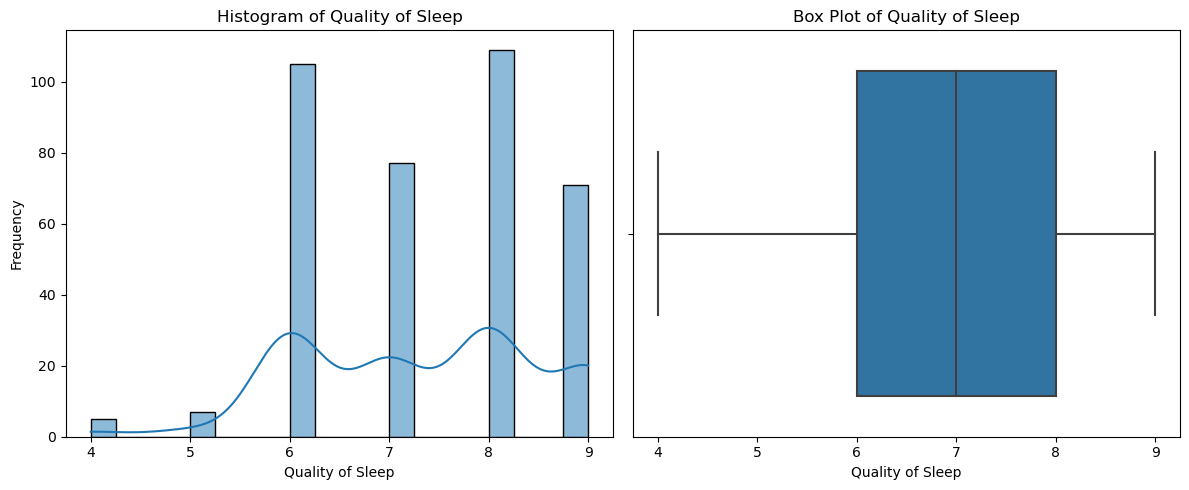

Outliers in Quality of Sleep:
 Series([], Name: Quality of Sleep, dtype: int64)


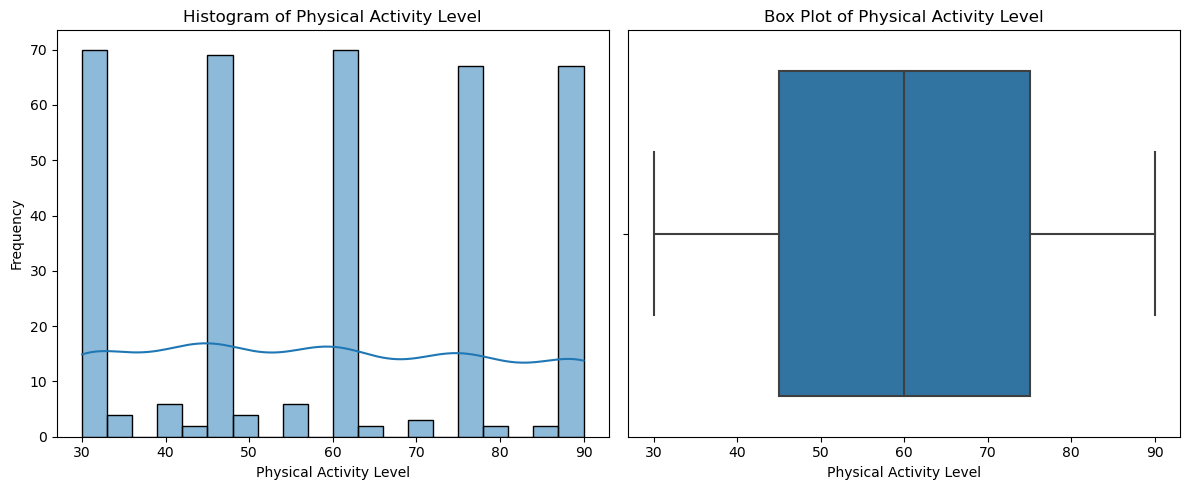

Outliers in Physical Activity Level:
 Series([], Name: Physical Activity Level, dtype: int64)


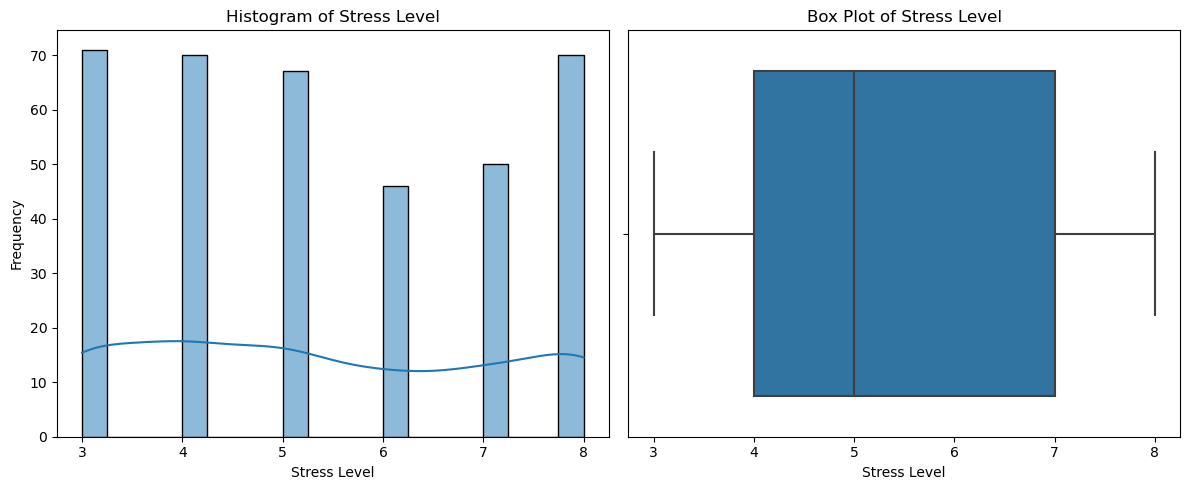

Outliers in Stress Level:
 Series([], Name: Stress Level, dtype: int64)


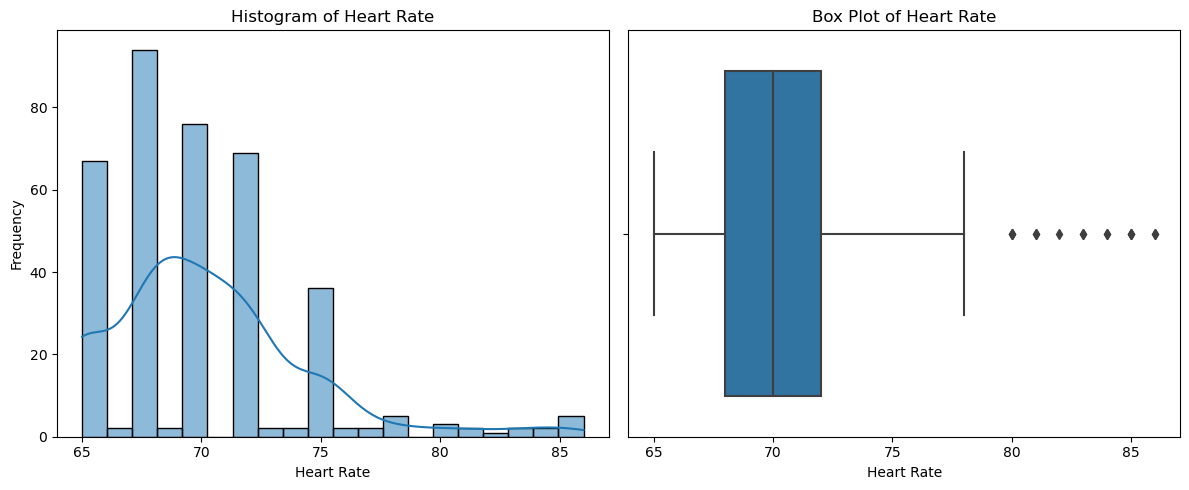

Outliers in Heart Rate:
 3      85
4      85
5      85
6      82
16     80
18     80
80     81
81     81
93     84
145    84
147    80
264    83
266    83
276    86
277    86
Name: Heart Rate, dtype: int64


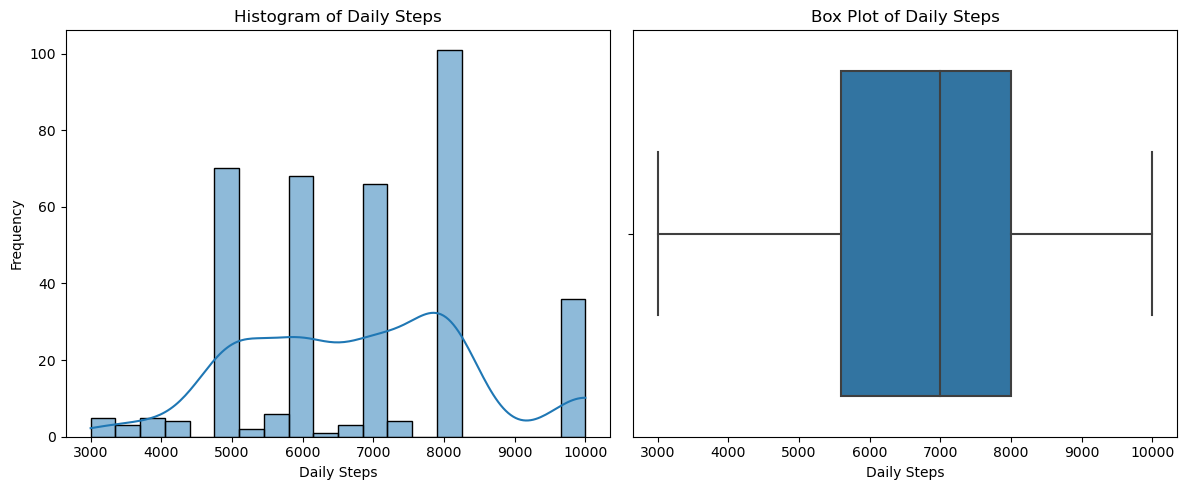

Outliers in Daily Steps:
 Series([], Name: Daily Steps, dtype: int64)


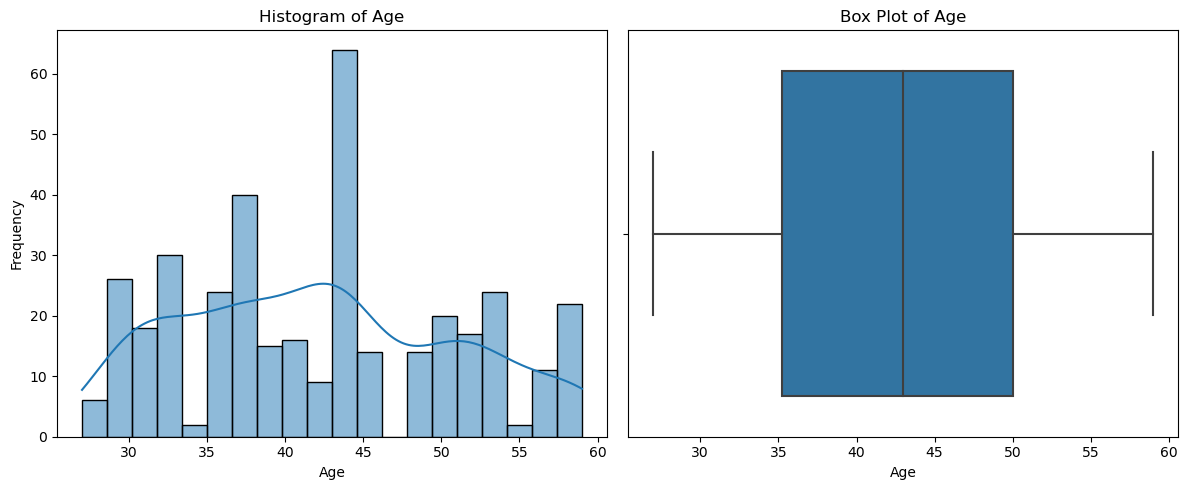

Outliers in Age:
 Series([], Name: Age, dtype: int64)


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_distributions_with_outliers(columns):
    for column in columns:
        plt.figure(figsize=(12, 5))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(data[column], kde=True, bins=20)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        # Box Plot dengan menyoroti outlier
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data[column])
        plt.title(f'Box Plot of {column}')
        plt.xlabel(column)
        plt.tight_layout()
        plt.show()

      
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        print(f"Outliers in {column}:\n", outliers[column])

columns_to_visualize = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
                        'Stress Level', 'Heart Rate', 'Daily Steps', 'Age']

visualize_distributions_with_outliers(columns_to_visualize)


Pada code di atas menampilkan data-data yang outlier

In [8]:
import pandas as pd


# Fungsi untuk mengganti outlier dengan nilai median
def replace_outliers_with_median(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Menghitung median
    median_value = data[column].median()
    
    # Mengganti outlier dengan nilai median
    data[column] = data[column].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

# Kolom-kolom yang akan diproses
columns_to_process = ['Sleep Duration', 'Heart Rate']

# Mengganti outlier dengan median untuk setiap kolom
for column in columns_to_process:
    replace_outliers_with_median(column)

# Simpan hasilnya ke file baru
data.to_csv('dataset_cleaned.csv', index=False)

print("Outliers have been replaced with the median value.")


Outliers have been replaced with the median value.


Code ini bertujuan untuk mendeteksi outlier dalam kolom-kolom tertentu (Sleep Duration dan Heart Rate) dari dataset dan menggantinya dengan nilai median dari kolom tersebut.

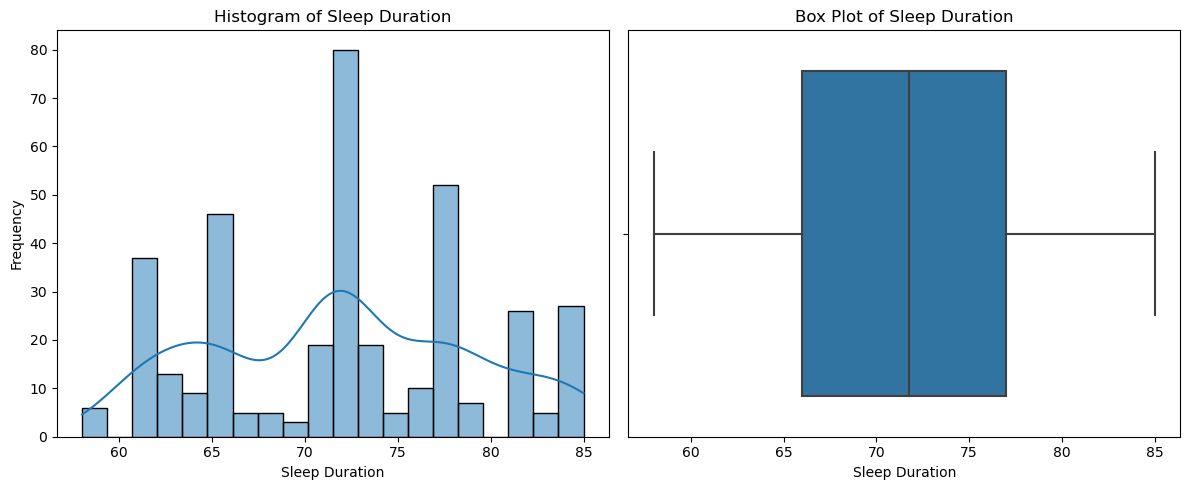

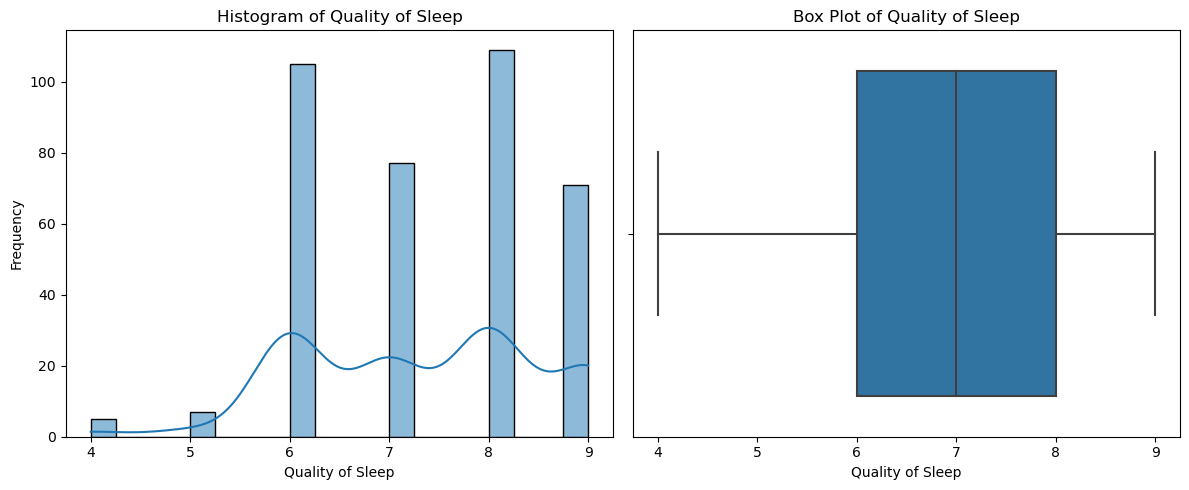

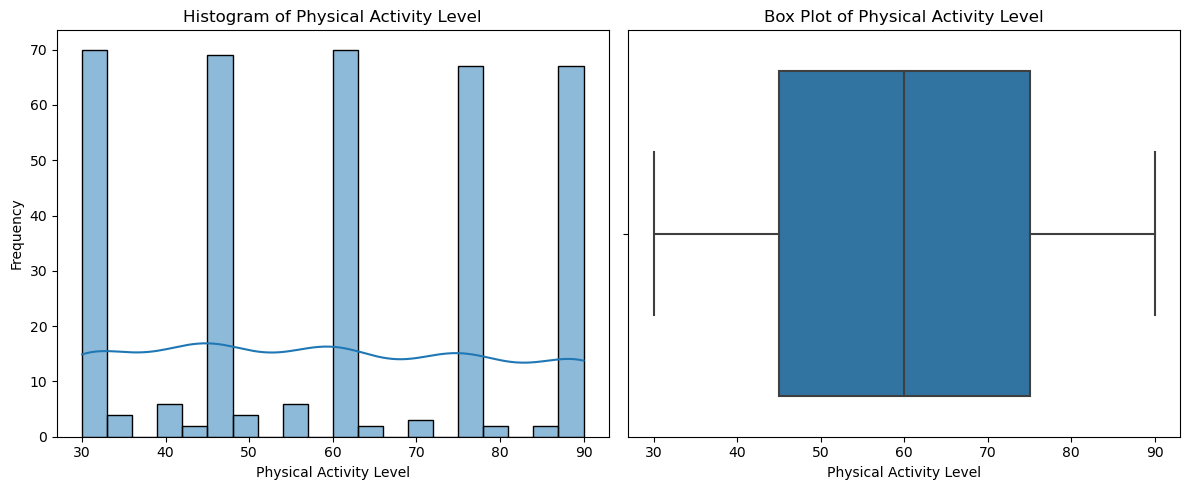

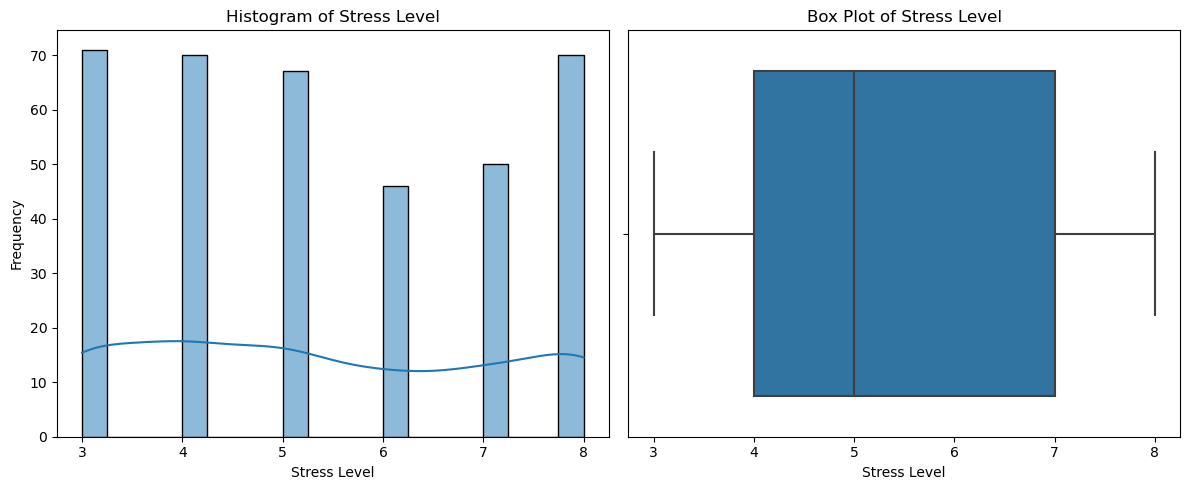

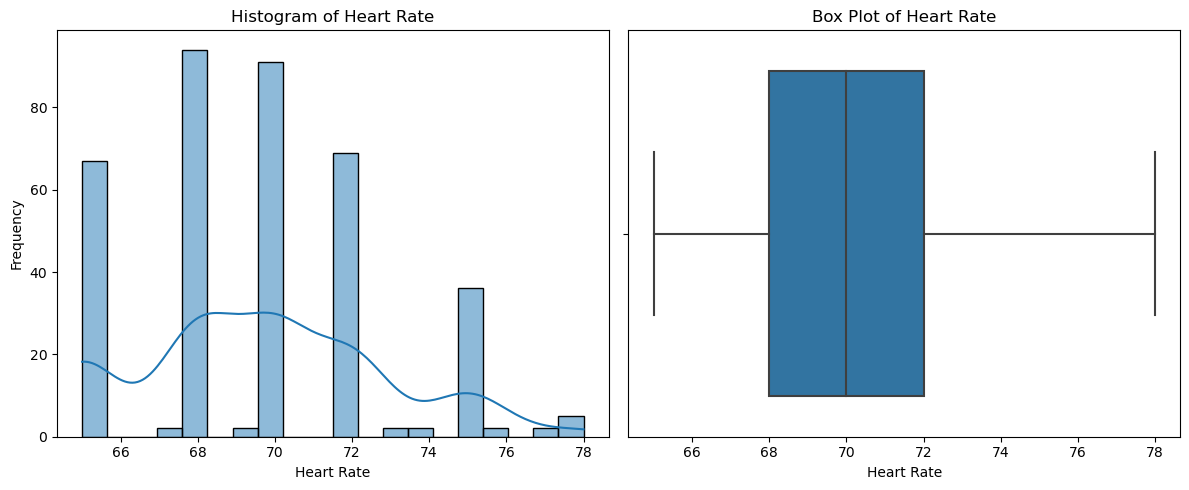

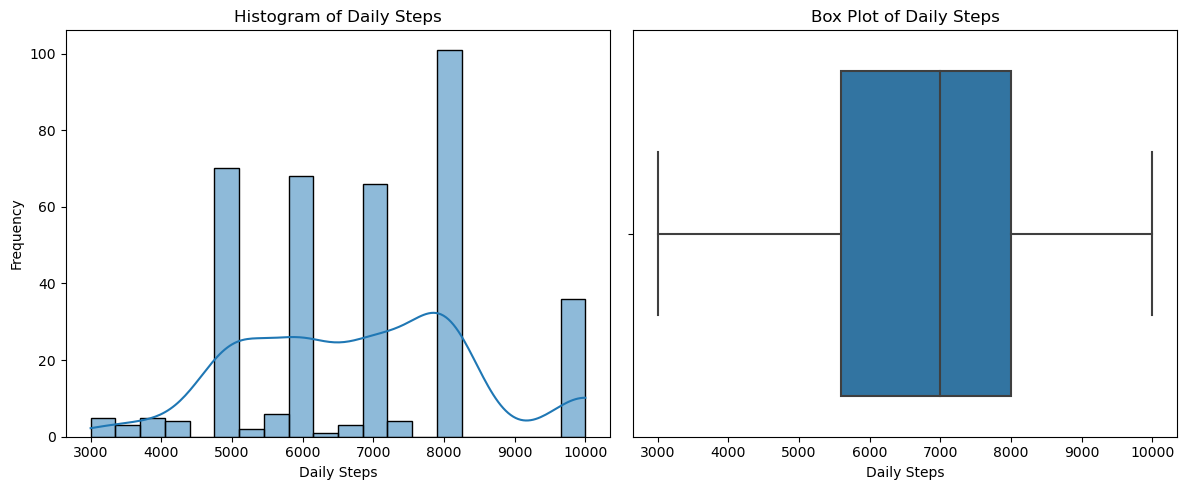

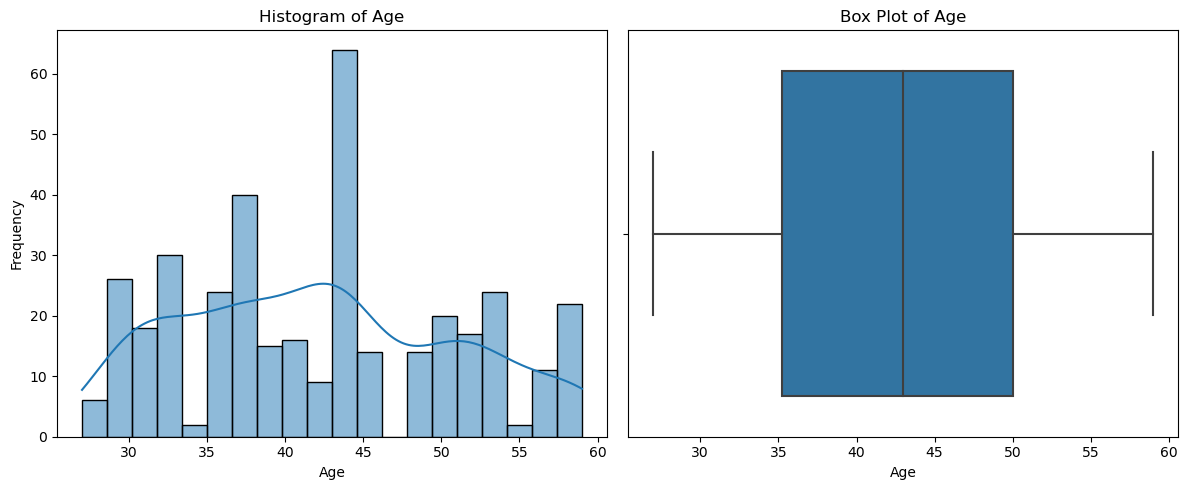

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_distributions(columns):
    for column in columns:
        plt.figure(figsize=(12, 5))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(data[column], kde=True, bins=20)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        # Box Plot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data[column])
        plt.title(f'Box Plot of {column}')
        plt.xlabel(column)
        plt.tight_layout()
        plt.show()

columns_to_visualize = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
                        'Stress Level', 'Heart Rate', 'Daily Steps', 'Age']

visualize_distributions(columns_to_visualize)


Pada code ini menampilkan visualisasi data yang telah diatasi outliernya

In [11]:
import pandas as pd

# Baca dataset
data = pd.read_csv(r"C:\Users\Documents\semester 3\data analisis eksploratif\dataset1.csv", sep=';')

columns_to_analyze = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
                       'Stress Level', 'Heart Rate', 'Daily Steps', 'Age']

def analyze_data(columns):
    results = {}
    for column in columns:
        mean = data[column].mean()
        median = data[column].median()
        mode = data[column].mode()[0]  
        std_dev = data[column].std()
        variance = data[column].var()
        data_range = data[column].max() - data[column].min()
        skewness = data[column].skew()
        
        # Kategorikan skewness
        if skewness > 0:
            skewness_type = "Positif (Right Skewed)"
        elif skewness < 0:
            skewness_type = "Negatif (Left Skewed)"
        else:
            skewness_type = "Simetris"

        results[column] = {
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            'Standard Deviation': std_dev,
            'Variance': variance,
            'Range': data_range,
            'Skewness': skewness,
            'Skewness Type': skewness_type
        }
    
    return results

analysis_results = analyze_data(columns_to_analyze)

for column, metrics in analysis_results.items():
    print(f"\nAnalysis for {column}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")



Analysis for Sleep Duration:
Mean: 64.34224598930481
Median: 71.5
Mode: 72
Standard Deviation: 22.261075353790858
Variance: 495.5554759071548
Range: 79
Skewness: -1.930268929104082
Skewness Type: Negatif (Left Skewed)

Analysis for Quality of Sleep:
Mean: 7.31283422459893
Median: 7.0
Mode: 8
Standard Deviation: 1.1969559197336044
Variance: 1.4327034737853186
Range: 5
Skewness: -0.20744763173836073
Skewness Type: Negatif (Left Skewed)

Analysis for Physical Activity Level:
Mean: 59.17112299465241
Median: 60.0
Mode: 60
Standard Deviation: 20.830803658071673
Variance: 433.9223810411322
Range: 60
Skewness: 0.07448690272010197
Skewness Type: Positif (Right Skewed)

Analysis for Stress Level:
Mean: 5.385026737967914
Median: 5.0
Mode: 3
Standard Deviation: 1.7745264441985167
Variance: 3.1489441011598314
Range: 5
Skewness: 0.15432958161578225
Skewness Type: Positif (Right Skewed)

Analysis for Heart Rate:
Mean: 70.16577540106952
Median: 70.0
Mode: 68
Standard Deviation: 4.135675535112214
Vari

Code ini akan menampilkan informasi pemusatan, penyebaran, nilai skewness, dan jenis skewness (positif, negatif, atau simetris) untuk setiap kolom dalam dataset